In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## 붓꽃 데이터 세트에 결정 트리 적용 및 시각화

- DecisionTreeClassifier 이용해 학습한 뒤 
- 규칙 트리 시각화

In [7]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=2020158011)

clf = DecisionTreeClassifier(random_state=2020158011)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2020158011
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


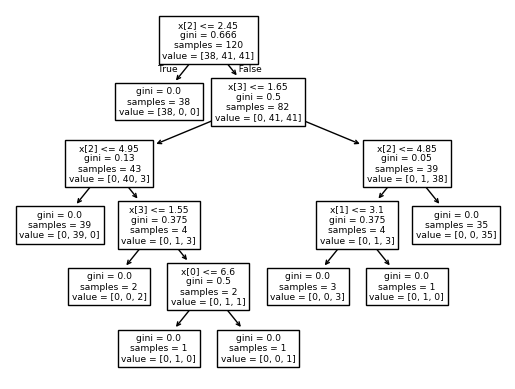

In [8]:
plot_tree(clf)
plt.show()

#### GraphViz로 결정트리 시각화

In [9]:
from sklearn.tree import export_graphviz

sklearn.tree.export_graphvizsklearn(decision_tree, out_file=None, *, max_depth=None, 
                                    feature_names=None, class_names=None, label='all', 
                                    filled=False, leaves_parallel=False, impurity=True, 
                                    node_ids=False, proportion=False, rotate=False, rounded=False, 
                                    special_characters=False, precision=3, fontname='helvetica')

In [11]:
export_graphviz(clf, out_file='output/iris_tree1.dot', feature_names=iris.feature_names,
                class_names=iris.target_names, filled=True)

#### 생성된 .dot 파일 출력 방법 2가지
1. Graphviz 시각화툴 사용 : .dot 파일 읽어서 출력
2. 이미지 파일로 변환해서 저장 후 출력

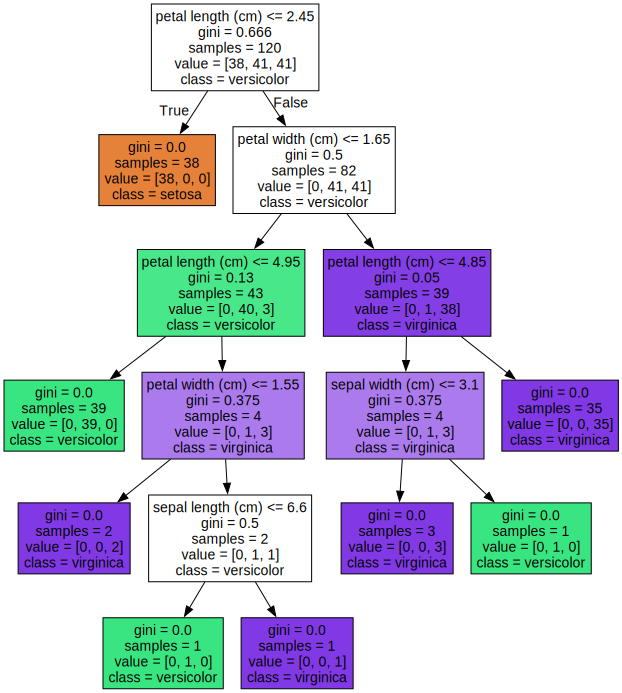

In [14]:
import graphviz

with open('output/iris_tree1.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

#### 1. graphviz 모듈의 Source() 사용 : .dot 파일 읽어서 출력

#### 2. 생성된 .dot 파일을 .png 파일로 변환해서 저장 후 출력
- 파이썬의 subprocess모듈의 run() 함수를 사용
- https://docs.python.org/ko/3/library/subprocess.html

In [16]:
from subprocess import run

run(['dot','-Tpng','output/iris_tree1.dot','-o', 'output/iris_tree1.png','-Gdpi=600'])

CompletedProcess(args=['dot', '-Tpng', 'output/iris_tree1.dot', '-o', 'output/iris_tree1.png', '-Gdpi=600'], returncode=0)

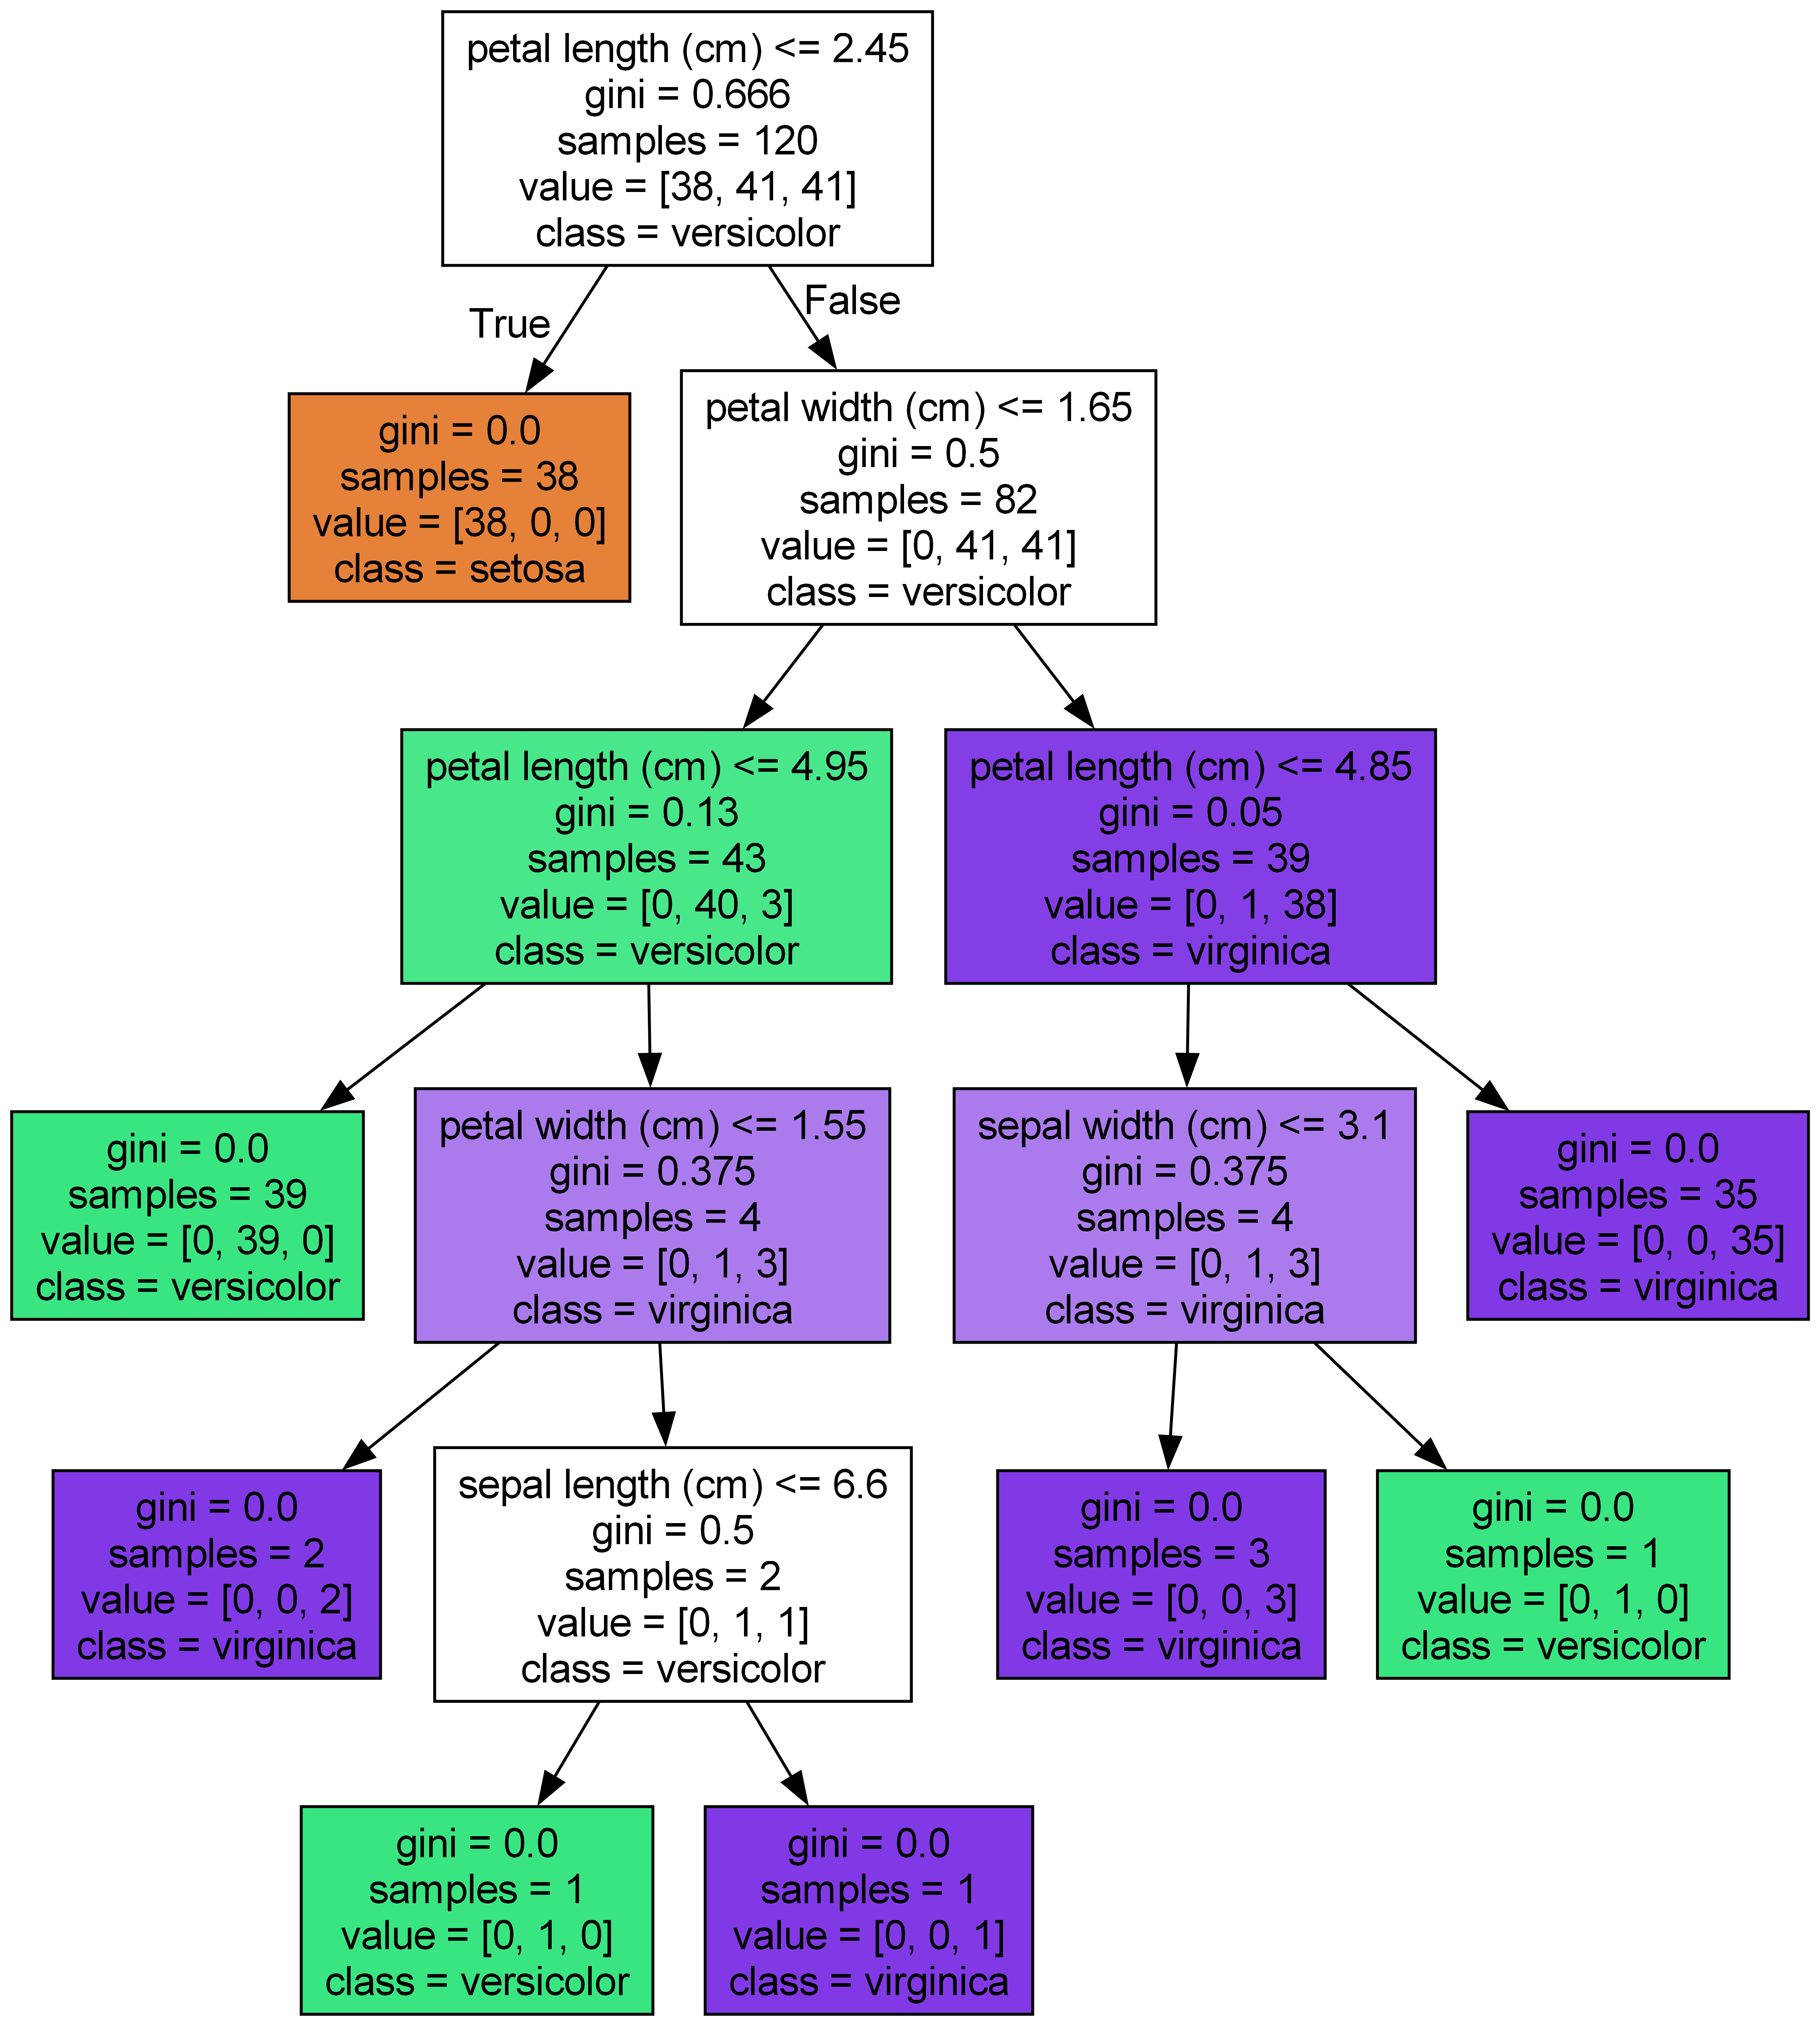

In [18]:
from IPython.display import Image
Image(filename='output/iris_tree1.png')

#### 노드 내에 기술된 지표의 의미

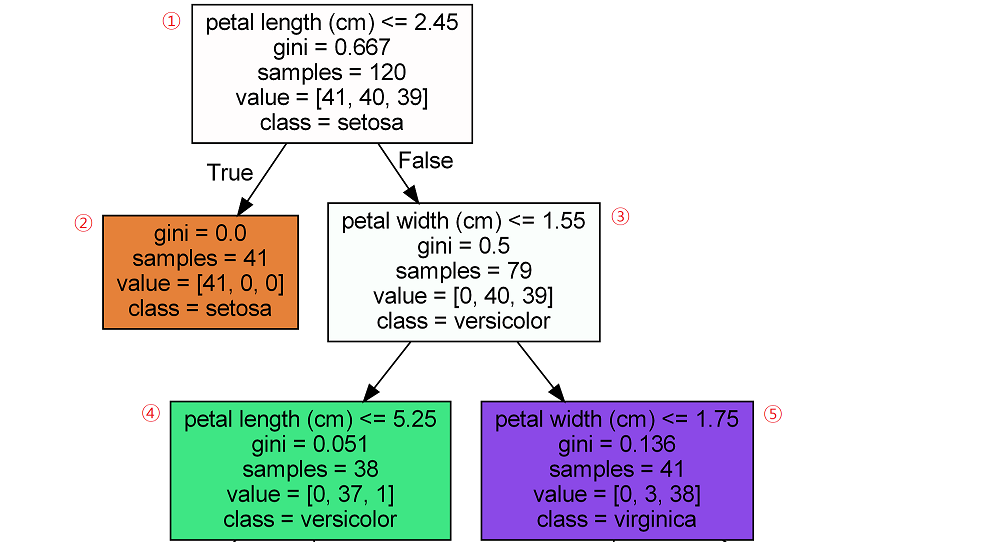

### 결정 트리 하이퍼 파라미터

- 매우 복잡한 규칙 트리가 만들어지면 과적합되는 문제 발생
- 하이퍼 파라미터를 사용하여 복잡한 트리가 생성되지 않도록 제어

- max_depth : 결정 트리의 최대 트리 깊이 제어


- min_samples_split : 자식 규칙 노드를 분할해서 만드는데 필요한 최소 샘플 데이터 개수
    
    
- min_samples_leaf : 리프 노드가 될 수 있는 최소 샘플 개수
    - 디폴트=1
    - min_samples_leaf 값을 증가시키면 브랜치 노드가 줄어들고 결정 트리가 더 간결하게 됨   

#### max_depth=3인 경우 결정트리

In [21]:
clf = DecisionTreeClassifier(max_depth=3)

In [33]:
def show_dtree(clf, fname, feature_names, target_names):
    clf.fit(X_train,y_train)
    export_graphviz(clf, out_file=fname, feature_names=iris.feature_names,class_names=iris.target_names, filled=True)
    with open(fname) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)
    

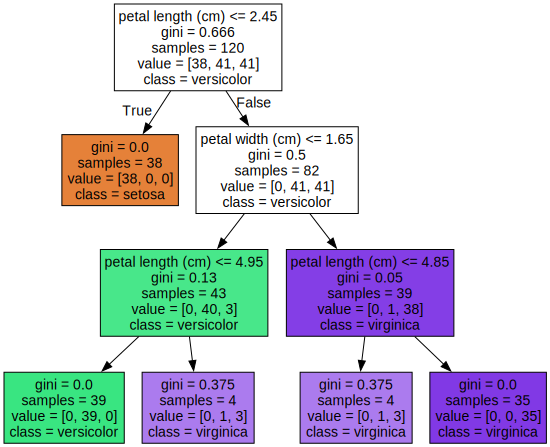

In [34]:
max_depth=3
fname = f'output/iris_tree_{max_depth}.dot'
clf = DecisionTreeClassifier(max_depth=max_depth,random_state=2020158011)
show_dtree(clf, fname)

#### max_depth=4인 경우 결정트리

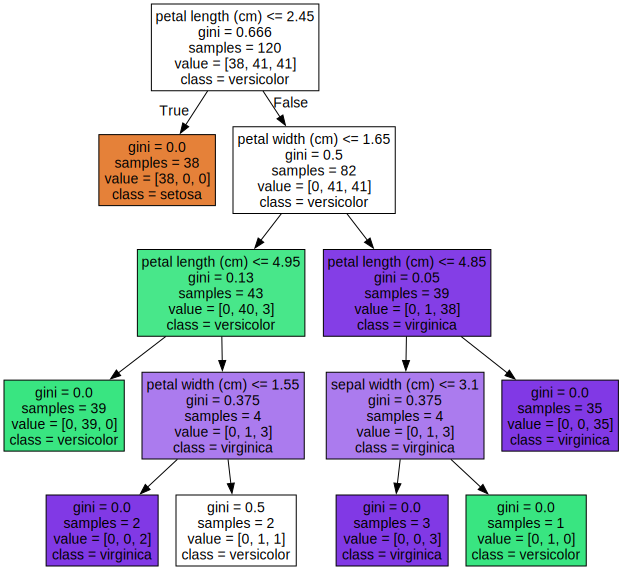

In [35]:
clf = DecisionTreeClassifier(max_depth=4)
max_depth=4
fname = f'output/iris_tree_{max_depth}.dot'
clf = DecisionTreeClassifier(max_depth=max_depth,random_state=2020158011)
show_dtree(clf, fname)

#### min_samples_split=4인 경우 결정트리

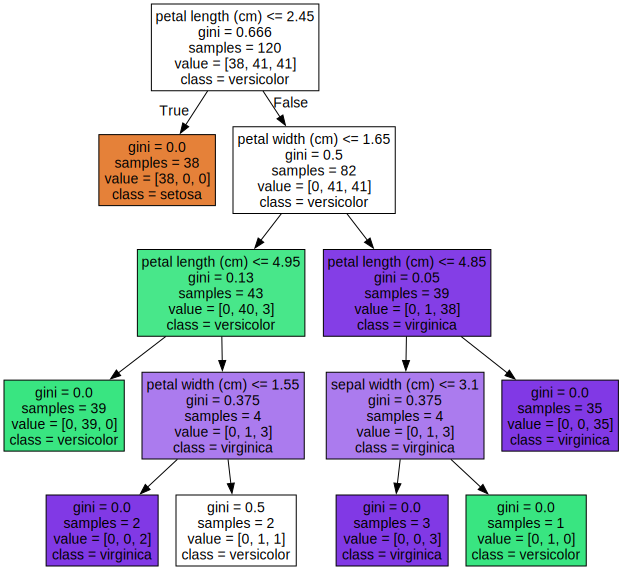

In [38]:
min_samples_split=4
fname = f'output/iris_tree_{max_depth}.dot'
clf = DecisionTreeClassifier(min_samples_split=min_samples_split,random_state=2020158011)
show_dtree(clf, fname)

#### min_samples_split=5인 경우 결정트리

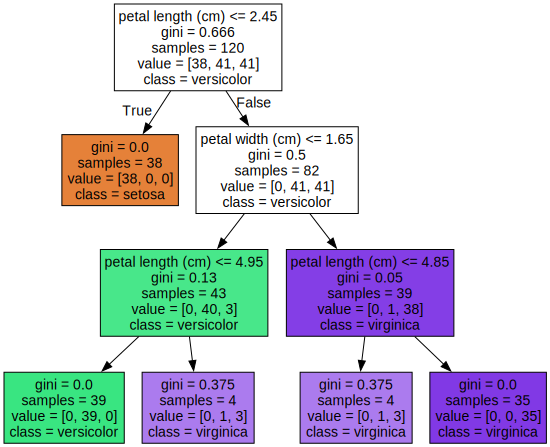

In [39]:
min_samples_split=5
fname = f'output/iris_tree_{max_depth}.dot'
clf = DecisionTreeClassifier(min_samples_split=min_samples_split,random_state=2020158011)
show_dtree(clf, fname)

#### min_samples_leaf=4인 경우 결정트리

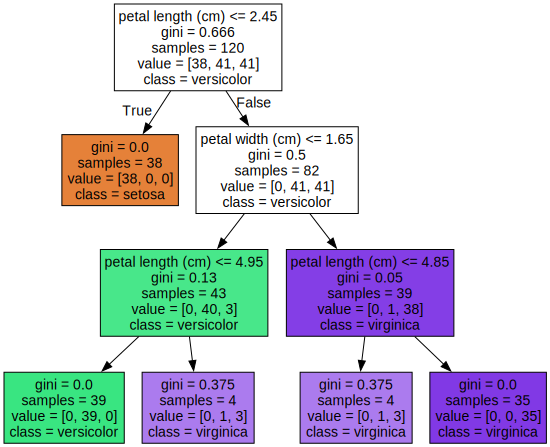

In [40]:
min_samples_leaf=4
fname = f'output/iris_tree_{max_depth}.dot'
clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf,random_state=2020158011)
show_dtree(clf, fname)

-----------------------------------

## feature_importances_ 속성 (피처 중요도)

- tree 생성 시 각 피처가 얼마나 중요한지를 평가한 값

- 피처별 중요도가 0에서 1사이의 수치로 ndarray 형태로 값을 반환
    - 피처 순서대로 값이 할당됨
        - [첫 번째 피처의 중요도, 두 번째 피처의 중요도, ....]


- 값이 높을 수록 해당 피처의 중요도가 높다는 의미
- 특정 노드의 중요도 값이 클수록, 그 노드에서 불순도가 크게 감소됨을 의미함

#### 피처별 중요도 출력

In [41]:
clf = DecisionTreeClassifier(random_state=156)
clf.fit(X_train, y_train)
clf.feature_importances_

array([0.00625391, 0.03126954, 0.54384132, 0.41863523])

In [43]:
for name, value in zip(iris.feature_names, clf.feature_importances_):
    print(f'{name}: \t{value:.3f}')

sepal length (cm): 	0.006
sepal width (cm): 	0.031
petal length (cm): 	0.544
petal width (cm): 	0.419


#### 피처별 중요도를 막대그래프로 시각화

In [53]:
def plot_ftr_importances(model, feature_names):
    imp = clf.feature_importances_
    idx=list(reversed(np.argsort(imp)))
    plt.figure(figsize=(6,4))
    sns.barplot(x = imp[idx], y=[feature_names[i] for i in idx])
    plt.show()

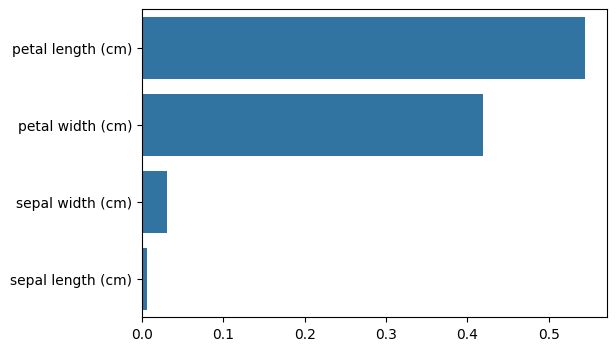

In [54]:
plot_ftr_importances(clf, iris.feature_names)

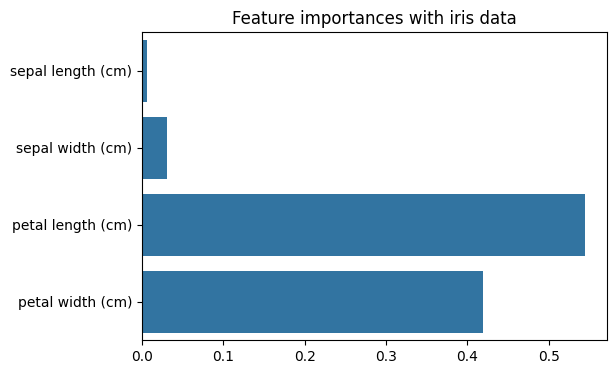

In [ ]:
sns.barplot(x=imp, y=iris.feature_names)
plt.title('Feature importances with iris data')
plt.show()

------------------------------